# Regressions: Process, Performance and Model Complexity

In this assignment you'll use verious regression methods on a small toy dataset, evaluate their peformances, and explore the impact of model complexity.

Several code snipptes are provided below, along with brief high-level descriptions. Some of them are copied or adapted from the textbook code for chapter 4. Please study the chapter and study  the materials and code.

The following code segment generates imports the python packages and classes, and set up some basic plotting parameters.

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# To plot pretty figures and save figures
%matplotlib inline
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
ASSIGNMENT_ID = "regressions"
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", ASSIGNMENT_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


The following code **generates and plots the data** used for training, validation and testing.

Normally, only the training data and validation data are used in the training and evaluation 
of the models, and the testing data is not supposed to viewed during the training process and 
should be used an independent (final) testing of a model. All three sets of the data are shown 
here and throughout this assignment, in part to reflect different subsets of the data
involved in the overall procedure.

There are a few questions in the comments. Please add your answers, also as comments.

C:\Users\minhv\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


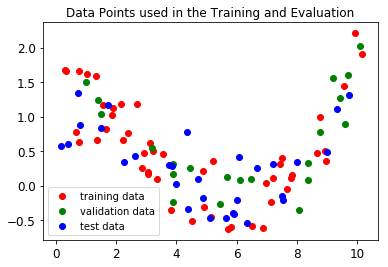

In [3]:
smallest_training_size = 30  #the smallest size of training dataset
model_sample_size = 100   # the number of sample points between x_min and x_max used for drawing the learned model

np.random.seed(0)  # seed 2
m = 100  # the number of total data points
x_min = 0
x_max = 10
X = np.linspace(x_min,x_max,m) + np.random.randn(m)/5  #create a row vector
y = np.cos(X/2) + X/8 + np.random.randn(m)/3    #also a row vector

#reshaped into column vectors
X = X.reshape(m,1)  
y = y.reshape(m,1)  

#split the data points into all trainning data (including training and validation data) and testing data
#how many points are in the alltrain subset? 70        how many points are in the testing subset? 30
X_alltrain, X_test, y_alltrain, y_test = train_test_split(X, y, random_state=10, train_size=0.7)             #state 0

#further split the alltrain dataset into training and validation subsets
#how many points are in the train subset? 49           how many points are in the val (for validation) subset? 21
X_train, X_val, y_train, y_val = train_test_split(X_alltrain, y_alltrain, random_state=100, train_size=0.7)   # state 5


plt.figure()
plt.scatter(X_train, y_train, c="r", label='training data')
plt.scatter(X_val, y_val, c= 'g', label='validation data')
plt.scatter(X_test, y_test, c = 'b', label='test data')
plt.legend(loc='best');
plt.title("Data Points used in the Training and Evaluation")
plt.show()

The method below **trains** the specified model, **computes
and returns the root mean squared errors (RMSE) and R2 values** of the train
models on the trainning data, validation data, and testing data. 

A sequence of training is conducted with repsect to different subsets of the 
training dataset, starting from the first 30 data points to all of the data points 
in the training set. Coding wise, this is done with a for loop.

The returned resulted can be used in evaluating the quality of the trained model
and used in generating learning curves.

In [4]:
def train_in_different_sizes(model, X_train, y_train, X_val, y_val, X_test, y_test):
    train_errors, val_errors, test_errors = [], [], []
    train_r2, val_r2, test_r2 = [], [], []
    for m in range(smallest_training_size, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        train_r2.append(model.score(X_train[:m], y_train[:m]))
        
        y_val_predict = model.predict(X_val)
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        val_r2.append(model.score(X_val, y_val))
    

        y_test_predict = model.predict(X_test)
        test_errors.append(mean_squared_error(y_test,y_test_predict))
        test_r2.append(model.score(X_test,y_test))
        
    return np.sqrt(train_errors), np.sqrt(val_errors), np.sqrt(test_errors), np.array(train_r2), np.array(val_r2), np.array(test_r2)



The following method plots the learing curves based on the given paramater data. 

In [5]:
def plot_learning_curves(plot_name, measure_name, train_measure, val_measure, test_measure):
    
    num_train_examples = train_measure.size
    learning_train_sizes = np.linspace(smallest_training_size, smallest_training_size +  num_train_examples - 1, num_train_examples)

    
    plt.plot(learning_train_sizes, train_measure, "r-+", linewidth=2, label="train")
    plt.plot(learning_train_sizes, val_measure, "g-", linewidth=3, label="validation")
    plt.plot(learning_train_sizes, test_measure, "b-", linewidth=3, label="test")

    plt.legend(loc="best", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel(measure_name, fontsize=14)
    plt.title(plot_name)

The following code uses the two functions defined above to do training in linear regression and plot the learning curves in $RMSE$ and $R^2$.

Saving figure linear_regression_learning_curves


FileNotFoundError: [Errno 2] No such file or directory: '.\\images\\regressions\\linear_regression_learning_curves.png'

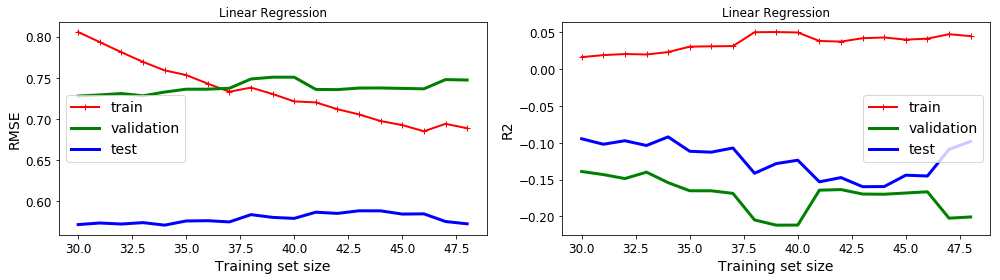

In [6]:
lin_reg = LinearRegression()
train_errors, val_errors, test_errors, train_r2, val_r2, test_r2 = train_in_different_sizes(lin_reg, X_train, y_train, X_val, y_val, X_test, y_test)

training_size = np.linspace(smallest_training_size, smallest_training_size + train_errors.size - 1, train_errors.size)

plt.figure(figsize=(14,4))
plt.subplot(121)
plot_learning_curves("Linear Regression", "RMSE", train_errors, val_errors, test_errors)

plt.subplot(122)
plot_learning_curves("Linear Regression", "R2", train_r2, val_r2, test_r2)
save_fig("linear_regression_learning_curves")  

plt.show()                      

Please review the textbook and notes about $RMSE$ and $R^2$, and **answer the following questions**.

(a) In general, are lower or higher $RMSE$ values considered better as a performance measure of a trained model on a dataset? Why?
**Lower. Because it measures the distance between 2 vectors: predictions and target values. So the smaller the distance, the more accurated our model.** 

(b) Are lower or higher $R^2$ values considered better? Why? 
**Higher. It is proportional improvement in prediction from the regression model, compared to the mean model. The higher R squared, the higher the goodness of fit of the model.**

As shown in the two figures above, the trained linear model has different $RMSE$ and $R^2$ values for the three datasets and differnt training sizes. Conisder the largest training size, which corresponds to the right end of the curves, answer the following questions.  

(c) For the RMSE measure, list the datasets in the **increasing order** of the learning performance achieved by the linear model, i.e. from the worst to the best. **Validation, Train, Test** 

(d) For the $R^2$ measure, list the datasets from the worst to the best.**Validation, Test, Train** 

Overall, the linear model does not perform well for the dataset. Next we will define a couple of functions and then use these functions to draw the learned polynomial models, from degree 1 (linear model) to degree 20, so that we can visually inspect and evaluate the trained models.

From this point on, the learning will use all the datapoints in X_train and y_train, NOT just some subsets as before.

What does the following function do? **We are transforming our training data, adding the degree-polynomial of each feature in the training set as new features. Then we fit the regression model to this extended data. X-model is just on the span of our x axis; y_model_predicted is our predicted y values using the already trained reg. Degree of our model: degree_param; number of instaces: model_sample_size**

In [7]:
def poly_train(regression, X_train, y_train, degree_param, model_sample_size):

    poly = PolynomialFeatures(degree = degree_param)
    X_train_poly = poly.fit_transform(X_train)
    reg = regression.fit(X_train_poly, y_train)

    X_model = np.linspace(x_min,x_max,model_sample_size).reshape(model_sample_size, 1) 
    X_model_poly = poly.fit_transform(X_model)
    y_model_predict = reg.predict(X_model_poly)

    return X_model, y_model_predict

What does the following function do? **Visualize how this model does on our training data and how it does on our validation and test data**

In [8]:
def draw_model(model_name, X_model, y_model_predict):
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    # plot training data
    plt.plot(X_train, y_train, 'ro', label='training data', markersize=10, alpha=0.5)
    # plot the line of our model
    plt.plot( X_model, y_model_predict, alpha=0.8, lw=2)
    plt.title(model_name)
    plt.legend(loc='best')
    

    plt.subplot(122)    
    plt.plot(X_val, y_val, 'go', label='validation data', markersize=10, alpha=0.5)
    plt.plot(X_test, y_test, 'bo', label='test data', markersize=10, alpha=0.5)
    plt.plot( X_model, y_model_predict, alpha=0.8, lw=2)
    plt.title(model_name)
    plt.legend(loc='best')

What does the following code snippet do? **Draw 20 models for 20 degrees**

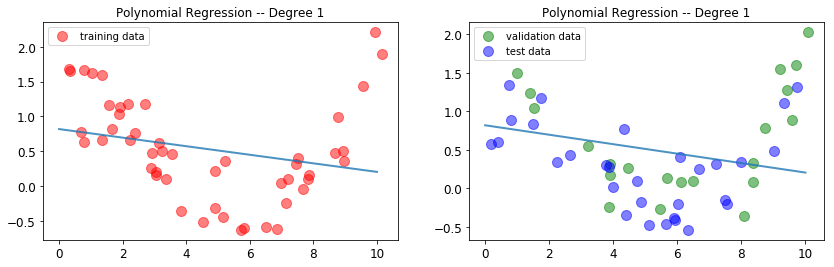

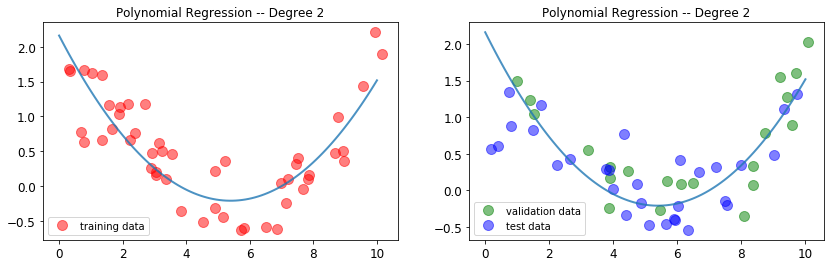

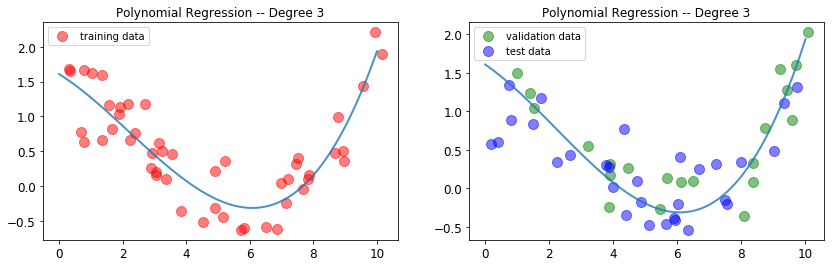

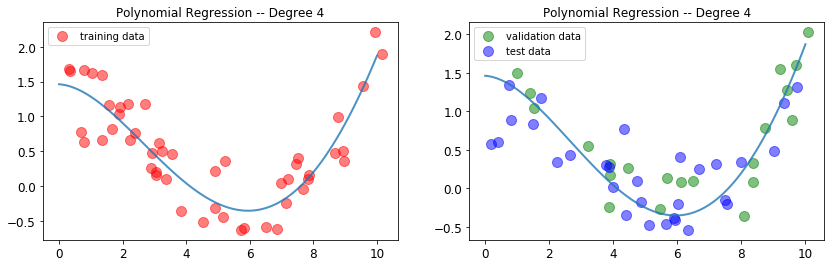

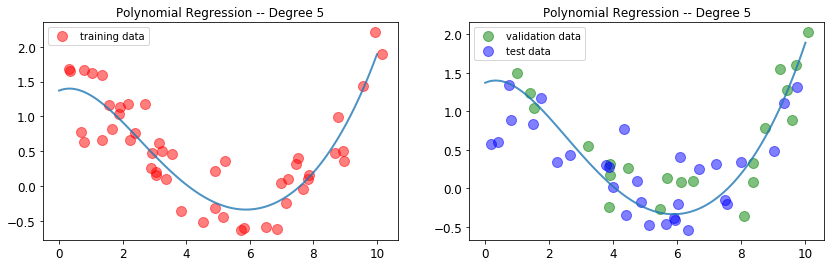

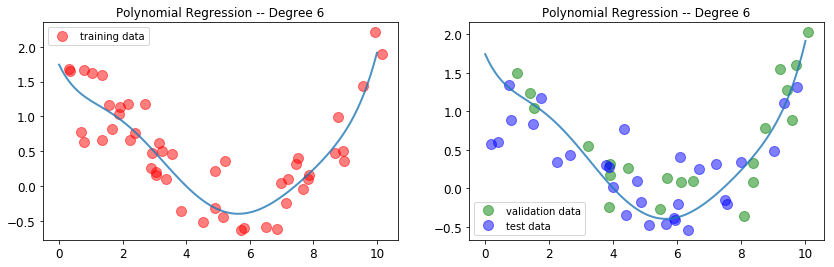

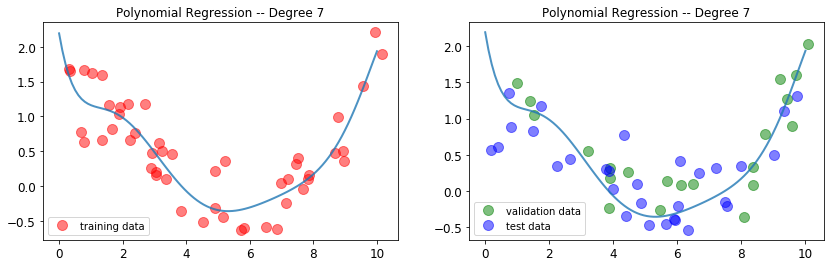

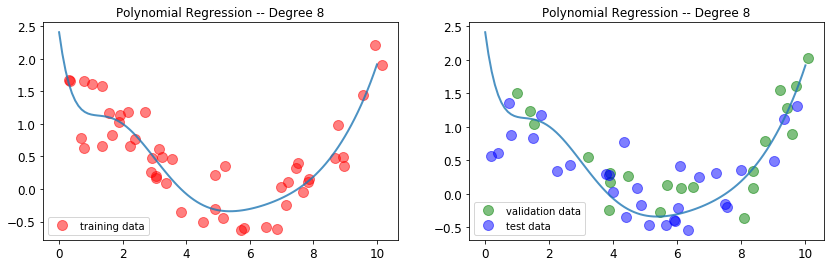

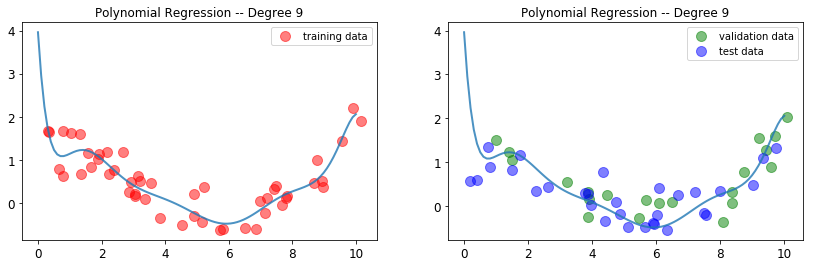

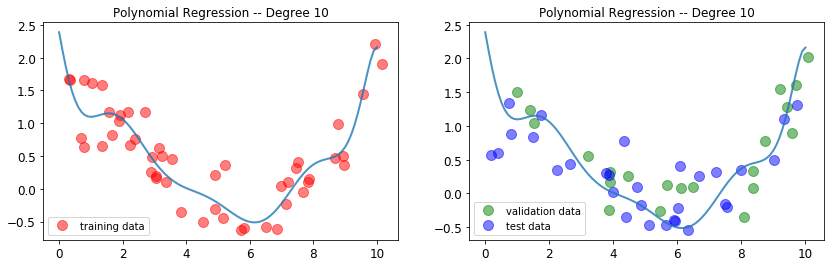

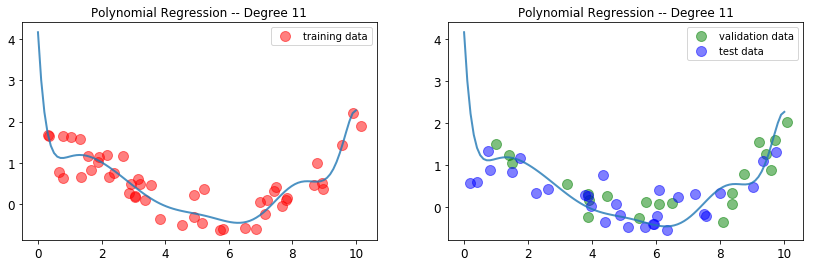

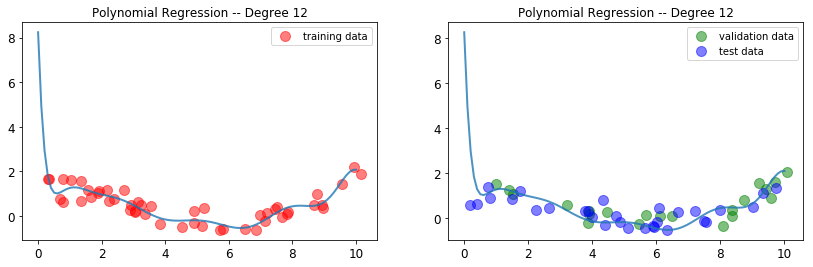

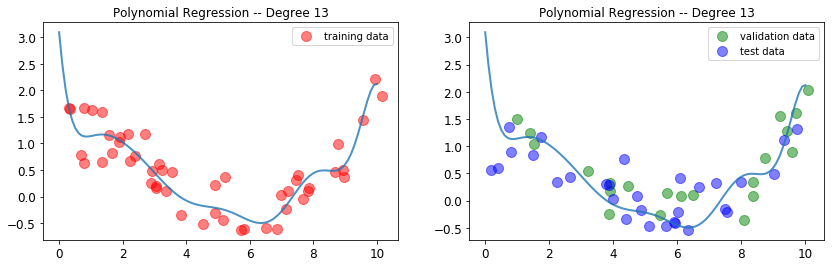

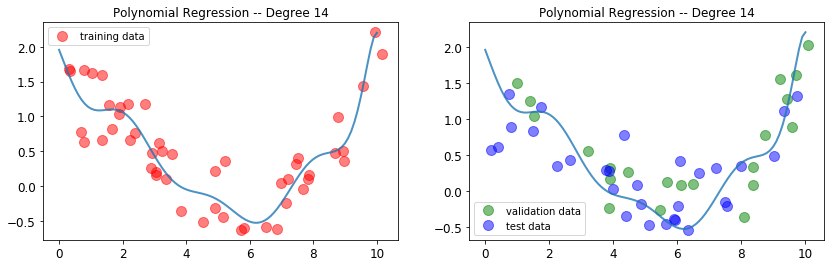

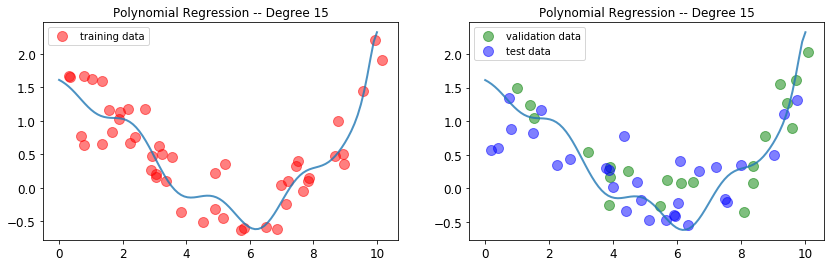

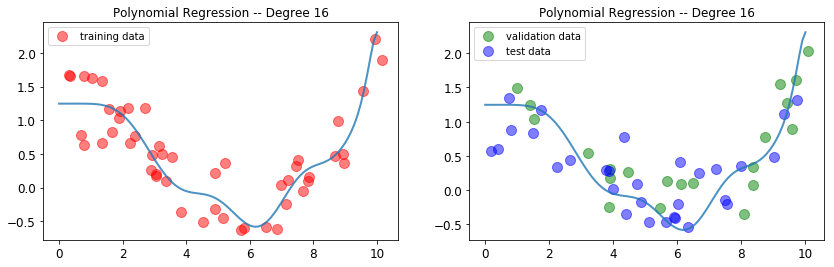

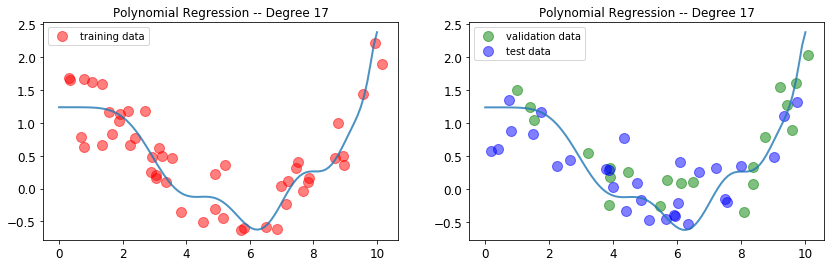

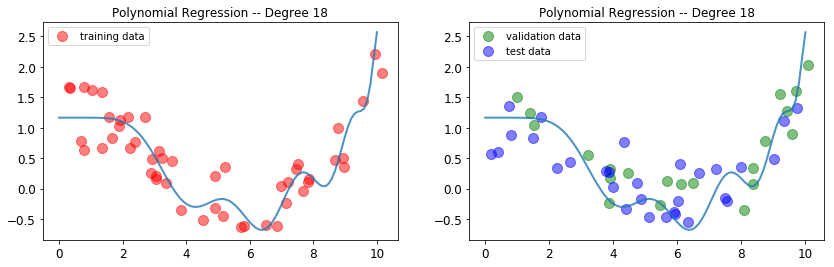

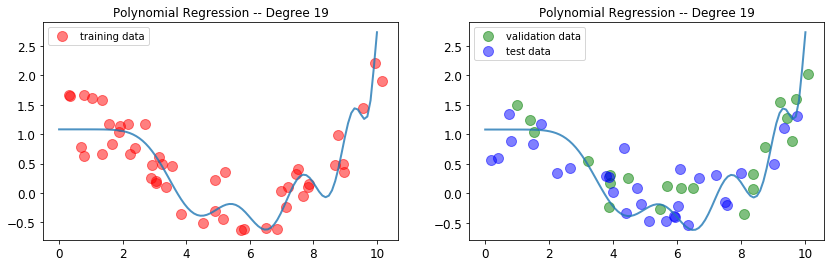

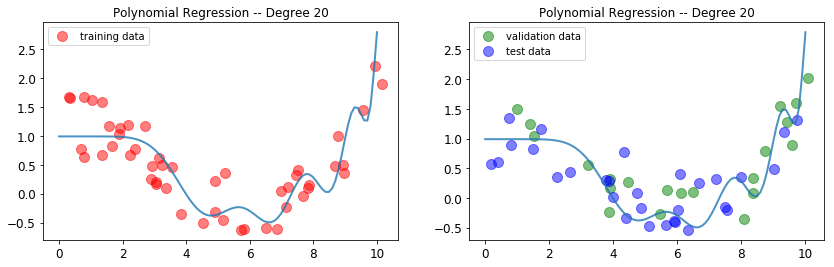

In [134]:
for i in range(1, 21):
    X_model, y_model_predict = poly_train(LinearRegression(), X_train, y_train, i, model_sample_size)
    draw_model("Polynomial Regression -- Degree " + str(i), X_model, y_model_predict)


** What observations ** do you have about the models above? **After degree 6, it seems like we overfit our train data**

Write script code to draw multiple models together, specifically for the models of degrees = {1, 5, 10, 15, 20}, in two plots, one for the training dataset, and the other for the validation and testing datasets.

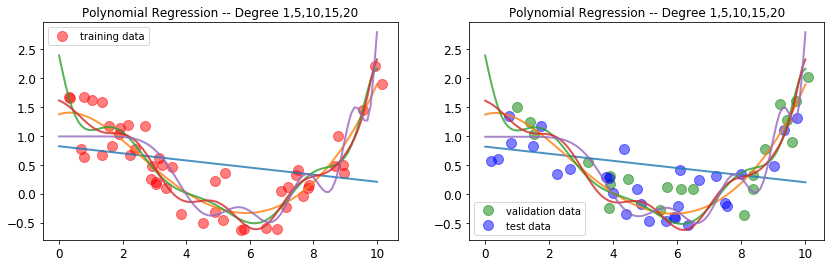

In [137]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
# plot training data
plt.plot(X_train, y_train, 'ro', label='training data', markersize=10, alpha=0.5)

for i in ([1,5,10,15,20]):
    X_model, y_model_predict = poly_train (LinearRegression(), X_train, y_train, i, model_sample_size)
    # plot the line of our model
    plt.plot( X_model, y_model_predict, alpha=0.8, lw=2)
    plt.title("Polynomial Regression -- Degree 1,5,10,15,20")
    plt.legend(loc='best')
    
    
plt.subplot(122)    
plt.plot(X_val, y_val, 'go', label='validation data', markersize=10, alpha=0.5)
plt.plot(X_test, y_test, 'bo', label='test data', markersize=10, alpha=0.5)
for i in ([1,5,10,15,20]):    
    X_model, y_model_predict = poly_train (LinearRegression(), X_train, y_train, i, model_sample_size)
    plt.plot( X_model, y_model_predict, alpha=0.8, lw=2)
    plt.title("Polynomial Regression -- Degree 1,5,10,15,20")
    plt.legend(loc='best')


Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 0 through 20. For each model **compute the RMSE and  $𝑅^2$ regression scores** on the training data, validation data, and the test data, and return them in 6 arrays.

In [10]:
def fits_poly_LinearRegression(X_train, y_train, X_val, y_val, X_test, y_test): 
    
    train_errors, val_errors, test_errors = [], [], []
    train_r2, val_r2, test_r2 = [], [], []
    for i in range (1, 21):
        poly = PolynomialFeatures(degree = i)
        reg = LinearRegression()
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.fit_transform(X_val)
        X_test_poly = poly.fit_transform(X_test)
        reg.fit(X_train_poly, y_train)
        
        y_train_predict = reg.predict(X_train_poly)
        train_errors.append(mean_squared_error(y_train, y_train_predict))
        train_r2.append(reg.score(X_train_poly, y_train))
        
        y_val_predict = reg.predict(X_val_poly)
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        val_r2.append(reg.score(X_val_poly, y_val))
        
        y_test_predict = reg.predict(X_test_poly)
        test_errors.append(mean_squared_error(y_test, y_test_predict))
        test_r2.append(reg.score(X_test_poly, y_test))
        
    return np.sqrt(train_errors), np.sqrt(val_errors), np.sqrt(test_errors), np.array(train_r2), np.array(val_r2), np.array(test_r2)

**Just testing**

In [81]:
poly = PolynomialFeatures(degree = 2)
reg = LinearRegression()
X_train_poly = poly.fit_transform(X_train)

write code to plot two figures, one for the $RMSE$ values and the other for the $R^2$, for different degrees (the x axis) and three datasets in one figure.

Saving figure RMSE and R squared for different degree


FileNotFoundError: [Errno 2] No such file or directory: '.\\images\\regressions\\RMSE and R squared for different degree.png'

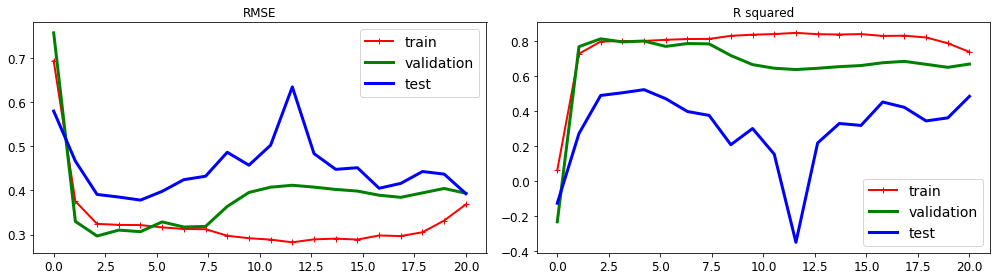

In [11]:
train_errors, val_errors, test_errors, train_r2, val_r2, test_r2 = fits_poly_LinearRegression(X_train, y_train, X_val, y_val, X_test, y_test)

X_degree = np.linspace(0, 20, 20) # row vector
X_degree = X_degree.reshape(20, 1) 

plt.figure(figsize=(14,4))
plt.title("RMSE and R squared for different degrees", size = 18)
plt.subplot(121)
plt.plot(X_degree, train_errors, "r-+", linewidth=2, label="train")
plt.plot(X_degree, val_errors, "g-", linewidth=3, label="validation")
plt.plot(X_degree, test_errors, "b-", linewidth=3, label="test")
plt.title("RMSE")
plt.legend(loc="best", fontsize=14)  

plt.subplot(122)
plt.plot(X_degree, train_r2, "r-+", linewidth=2, label="train")
plt.plot(X_degree, val_r2, "g-", linewidth=3, label="validation")
plt.plot(X_degree, test_r2, "b-", linewidth=3, label="test")
plt.title("R squared")
plt.legend(loc="best", fontsize=14)  

save_fig("RMSE and R squared for different degree")  

plt.show()                      

Make observations about the $RMSE$ and  $R^2$ curves, and state which degrees you think are likely suitable for modeling the data. Which degree would you choose to use as the degree of the model? Why?

**About RMSE:** It starts out really high at degree 0 and 1, which makes sense because we are clearly underfitting the data. In our train dataset, RMSE stays low constanly throughout all 20 degrees because the model fits train dataset well. However, it gets really high after degree 3 for test dataset (and also fairly high for validation dataset), which indicates overfitting. 

**About R squared:** It also starts out fairly low for degree 0 and 1 with the same reason above. Our train dataset constantly has a high R squared throughout 20 degrees. However, it gets low after degree 3 for test dataset (hitting the bottom around degree 12), which indicates overfitting. 







For **the rest of the assignment and each learning method,  train** the specified learning model on the training dataset,  **plot** the model curve and scattered data points in two figures (one for the training dataset, and the other for the validation and testing data sets), **compute and print** the $RMSE$ and $R^2$ values of the model on the three datasets -- training, validation, and testing.    

You can consider **write a function** that does all the above and can be used for some, if not all, of the learning methods that you need to experiement with. You can let this function accept a learning model parameter.

Also, you can start the training with the degree that you chose in the previous step, and try different degress to find one that you think is the best model in that learning method that you can find under your time constraint.

In [130]:
best_degree = 3 # prefered degree
training_size = len(X_train)
poly = PolynomialFeatures(degree = best_degree)
X_model = np.linspace(x_min,x_max,training_size).reshape(training_size, 1) 
X_model_poly = poly.fit_transform(X_model)

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_train_poly, y_train)

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)

####  The function that does all of the job

In [128]:
def r_squared(y_raw, y_predicted):
    mean = np.mean(y_raw)
    numerator = 0
    denominator = 0
    for yi, ei in y_raw, y_predicted:
        numerator += (yi - ei)^2
    for yi in y_raw:
        denominator += (yi - mean)^2
        
    return 1-(numerator/denominator)
        
        

def stat_of_one_model(function, X_train_poly, y_train, X_val_poly, y_val, X_test_poly, y_test): 
    train_errors, val_errors, test_errors = 0, 0, 0
    train_r2, val_r2, test_r2 = 0, 0, 0
    
    y_train_predict = function.predict(X_train_poly)
    y_val_predict = function.predict(X_val_poly)
    y_test_predict = function.predict(X_test_poly)
    
    train_errors = mean_squared_error(y_train, y_train_predict)
    train_r2 = r_squared(y_train, y_train_predict)
    
    val_errors = mean_squared_error(y_val, y_val_predict)
    val_r2 = r_squared(y_val, y_val_predict)
    
    test_errors = mean_squared_error(y_test, y_test_predict)
    test_r2 = r_squared(y_test, y_test_predict)
    
    return train_errors, val_errors, test_errors, train_r2, val_r2, test_r2
    
    
def the_one_that_does_it_all(function, X_train_poly, X_train, y_train, X_val_poly, X_val, y_val, X_test_poly, X_test, y_test): 
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    # plot training data
    plt.plot(X_train, y_train, 'ro', label='training data', markersize=10, alpha=0.5)
    # compute predicted values of y 
    y_model_predicted = function(X_train_poly, y_train)
    #y_train_predicted = X_train_poly.dot(theta)
    # plot the line of our model
    plt.plot(X_model, y_model_predicted, alpha=0.8, lw=2)
    plt.title("Train Data")
    plt.legend(loc='best')
    
    plt.subplot(122)    
    plt.plot(X_val, y_val, 'go', label='validation data', markersize=10, alpha=0.5)
    plt.plot(X_test, y_test, 'bo', label='test data', markersize=10, alpha=0.5)
    # plot the line of our model
    plt.plot(X_model, y_model_predicted, alpha=0.8, lw=2)
    plt.title("Validation and Test Data")
    plt.legend(loc='best')
    
    train_errors, val_errors, test_errors, train_r2, val_r2, test_r2 = stat_of_one_model(ridge_reg, X_train_poly, y_train, X_val_poly, y_val, X_test_poly, y_test)
    print("RMSE on 3 different datasets: ")
    print("Train Dataset: " + str(train_errors))
    print("Validation Dataset: " + str(val_errors))
    print("Test Dataset: " + str(test_errors))
    print("R squared on 3 differetn datasets: ")
    print("Train Dataset: " + str(train_r2))
    print("Validation Dataset: " + str(val_r2))
    print("Test Dataset: " + str(test_r2))
    

## Visualize using different learning method

In [109]:
from sklearn.linear_model import SGDRegressor

def SGD(X_train_poly, y_train):
    sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
    sgd_reg.fit(X_train_poly, y_train)
    
    X_model = np.linspace(x_min,x_max,training_size).reshape(training_size, 1) 
    X_model_poly = poly.fit_transform(X_model)
    y_model_predict = sgd_reg.predict(X_model_poly)
    
    return y_model_predict

In [112]:
y_model_predicted_stochastic = SGD(X_train_poly, y_train)
#the_one_that_does_it_all(SGD, X_train_poly, X_train, y_train, X_val_poly, X_val, y_val, X_test_poly, X_test, y_test)
y_model_predicted_stochastic

C:\Users\minhv\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\minhv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 1.43702902e+09, -5.92593868e+09, -1.59708509e+11, -4.01944512e+11,
       -6.74667774e+11, -9.19912126e+11, -1.07971140e+12, -1.09609941e+12,
       -9.11110003e+11, -4.66776999e+11,  2.94865773e+11,  1.43178448e+12,
        3.00194530e+12,  5.06331441e+12,  7.67385796e+12,  1.08915421e+13,
        1.47743331e+13,  1.93801970e+13,  2.47671001e+13,  3.09930085e+13,
        3.81158884e+13,  4.61937059e+13,  5.52844272e+13,  6.54460186e+13,
        7.67364461e+13,  8.92136759e+13,  1.02935674e+14,  1.17960407e+14,
        1.34345841e+14,  1.52149942e+14,  1.71430676e+14,  1.92246010e+14,
        2.14653909e+14,  2.38712339e+14,  2.64479268e+14,  2.92012660e+14,
        3.21370483e+14,  3.52610703e+14,  3.85791284e+14,  4.20970195e+14,
        4.58205400e+14,  4.97554867e+14,  5.39076561e+14,  5.82828448e+14,
        6.28868494e+14,  6.77254667e+14,  7.28044931e+14,  7.81297254e+14,
        8.37069601e+14])

C:\Users\minhv\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\minhv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\minhv\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has

ValueError: x and y must have same first dimension, but have shapes (100, 1) and (49,)

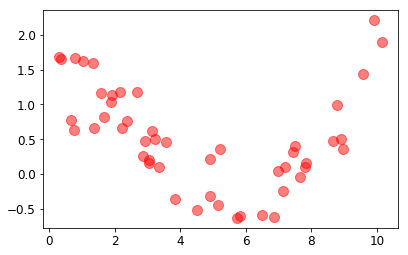

In [140]:
y_model_predicted_SGD = SGD(X_train_poly, y_train)
the_one_that_does_it_all(SGD, X_train_poly, X_train, y_train, X_val_poly, X_val, y_val, X_test_poly, X_test, y_test)
#y_model_predicted_ridge

Write code to use **SGD** learning.

In [21]:
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule_minibatch(t):
    return t0 / (t + t1)

def MBGD(X_train, y_train, minibatch_size):
    theta = np.random.randn(best_degree + 1, 1)  # random initialization
    
    for epoch in range(1000):
        shuffled_indices = np.random.permutation(training_size)
        X_b_shuffled = X_train_poly[0:shuffled_indices[minibatch_size]]
        y_shuffled = y_train[0:shuffled_indices[minibatch_size]]
        
        gradients = 2/minibatch_size * X_b_shuffled.T.dot(X_b_shuffled.dot(theta) - y_shuffled)
        eta = learning_schedule_minibatch(epoch)
        theta = theta - eta * gradients

    return theta

Write code to use **MBGD learning**.

In [116]:
from sklearn.linear_model import Ridge

def ridge(X_train_poly, y_train):
    ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
    ridge_reg.fit(X_train_poly, y_train)
    y_train_predict = ridge_reg.predict(X_model_poly)
    
    return y_train_predict

ValueError: too many values to unpack (expected 2)

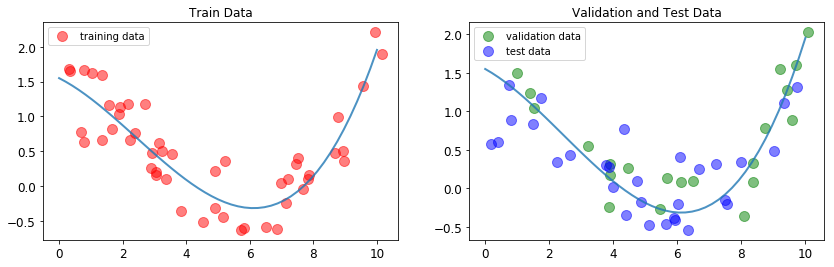

In [131]:
y_model_predicted_ridge = ridge(X_train_poly, y_train)
the_one_that_does_it_all(ridge, X_train_poly, X_train, y_train, X_val_poly, X_val, y_val, X_test_poly, X_test, y_test)
#y_model_predicted_ridge

Write code to do **ridge regression**.

In [132]:
from sklearn.linear_model import Lasso

def lasso(X_train_poly, y_train):
    lasso_reg = Lasso(alpha=0.1)
    lasso_reg.fit(X_train_poly, y_train)
    y_train_predict = lasso_reg.predict(X_model_poly)
    
    return y_train_predict

ValueError: too many values to unpack (expected 2)

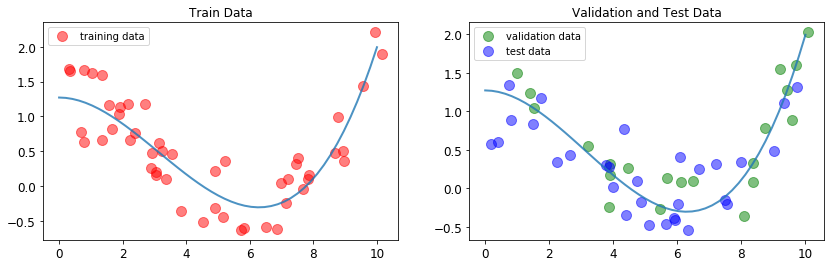

In [133]:
y_model_predicted_lasso = lasso(X_train_poly, y_train)
the_one_that_does_it_all(lasso, X_train_poly, X_train, y_train, X_val_poly, X_val, y_val, X_test_poly, X_test, y_test)
#y_model_predicted_ridge

Write code to do **Lasso regression**.

In [138]:
from sklearn.linear_model import ElasticNet
    
def elastic(X_train_poly, y_train):
    elastic_net = ElasticNet(random_state=0)
    elastic_net.fit(X_train_poly, y_train)
    y_train_predict = elastic_net.predict(X_model_poly)
    
    return y_train_predict

ValueError: x and y must have same first dimension, but have shapes (100, 1) and (49,)

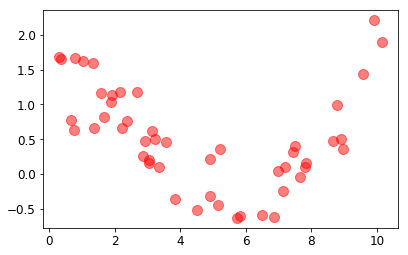

In [141]:
y_model_predicted_elastic = elastic(X_train_poly, y_train)
the_one_that_does_it_all(elastic, X_train_poly, X_train, y_train, X_val_poly, X_val, y_val, X_test_poly, X_test, y_test)
#y_model_predicted_ridge

Write code to do **elastic net regression**.

### Observations on the models, which seems to work better,  ...

What is your best model? What are your best model's $RMSE$ and $R^2$ values on the three subset datasets?...




### Your reflections on the process, different methods ...

For example, which parts of the process were challenging? Which methods were easier (or more challenging) to work with? Which methods produced good models? ...
